# Clothes Size Prediction Using Machine Learning


# Introduction
Online shopping has always been time saving and efficient. In this panademic it has become more helpful. 
People who are new to online shopping might face size problem. Even this might be issue to regularls. Size chart provided by shopping site have many lengths to measure. 


My  aim of this project is to create a machine learning model that will predict clothes size using only weight,height and age of the person.The dataset is taken from the [Kaggle "Clothes-Size-Prediction"](https://www.kaggle.com/tourist55/clothessizeprediction).
name of the dataset is *final_test.csv* file. I will use the training data to both train and test our algorithms.

I will compare 3 models for this problem and will try to fing better among them:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

But first, I will perform EDA on data to find interesting information about it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading dataset 
ClothesSize = pd.read_csv("final_test.csv")

#displaying information
ClothesSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


Above shown is the general information of dataset.

Data set has 119734 rows with 4 columns/variables:
1. Weight of a person - in Kg
2. Age of a person - in Years
3. Height of a person - in cm
4. Size of Clothes - (S,M,L,etc.)

# Methods
This is how data looks in data set.

In [2]:
#showing first 10 rows from dataset
ClothesSize.head(10)


,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


Following table shows statistics information about Weight,Age and Height variable.

In [3]:
#describing the data set
ClothesSize.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


1. Average Weight from dataset is 61.75 Kg with minimum of 22 Kg and maximum of 136 Kg.
2. Minimum Age present is 0 years to maximum age of 117 years with mean age of 34.02 years.
3. For height variable, minimum value is 137.16 cm and maximum is 193.04 cm with average height of 165.80 cm

In [4]:
#Size

Uniquesizes=ClothesSize["size"].unique()
print('Unique sizes:',Uniquesizes)

Unique sizes: ['XL' 'L' 'M' 'S' 'XXS' 'XXXL' 'XXL']


This are the 7 unique sizes value ranging from XXS to XXXL.

# Cleaning data set
As seen above that minimum age is found 0 , lets check data having age 0.


In [5]:
#showing first 10 rows having age=0

ClothesSize[ClothesSize["age"]==0].head(10)

,weight,age,height,size
1261,56,0.0,170.18,S
7142,56,0.0,170.18,S
9146,56,0.0,165.10,M
9324,58,0.0,172.72,XL
22046,56,0.0,170.18,S
23593,77,0.0,177.80,XXXL
28626,58,0.0,172.72,M
34758,58,0.0,172.72,L
35313,70,0.0,160.02,XXXL
40653,53,0.0,157.48,XXS


These values do not make any sense. So, removing deleting some rows from dataset having less age values.

In [6]:
#only taking rows having age values more than 10

ClothesSize = ClothesSize.loc[ClothesSize["age"]>10]

Checking for any NA values present


In [7]:
#check for NA values

ClothesSize.isna().sum()

weight      0
age         0
height    324
size        0
dtype: int64

There are some NA values present.
So deleting rows having NA values.

In [8]:
#dropping rows having NA values 
ClothesSize.dropna(axis=0,inplace=True)

#confirming NAvalues
ClothesSize.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

The data is clean now,I will analyse data now.

First, Let us check distribution of sizes

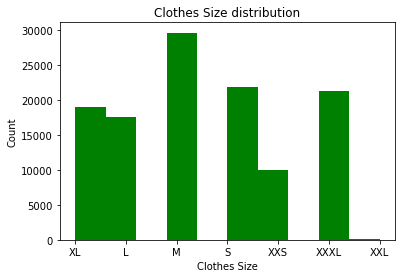

In [9]:
#graph to check count of each sizes
plt.hist(ClothesSize["size"],color='green')
plt.title("Clothes Size distribution")
plt.xlabel('Clothes Size')
plt.ylabel('Count')
plt.show()

From the graph, Size with 'M' maximum count and size 'XXL' has very less count.

Graphs for remaining variables are as follows:

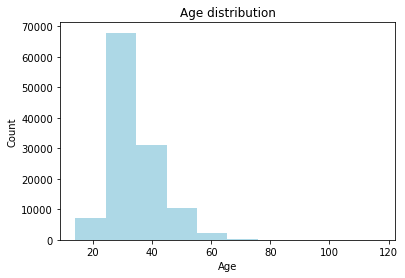

In [10]:
#Graph for counting Age

plt.hist(ClothesSize["age"],color='lightblue')
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Most people are of age between 30-40 years

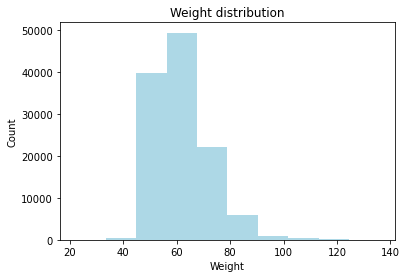

In [11]:
#Graph for counting Weight

plt.hist(ClothesSize["weight"],color='lightblue')
plt.title("Weight distribution")
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()


Most people are having weight between 40-80 Kgs.

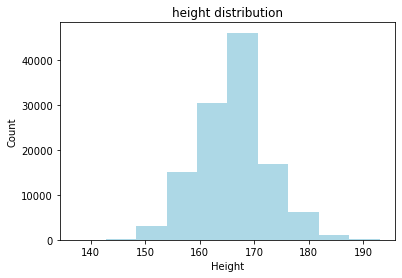

In [12]:
#count of height

plt.hist(ClothesSize["height"],color='lightblue')
plt.xlabel('Height')
plt.title("height distribution")
plt.ylabel('Count')
plt.show()

Most people are having height between 160-170 cm.

Now let us see how variables are related to target variable size


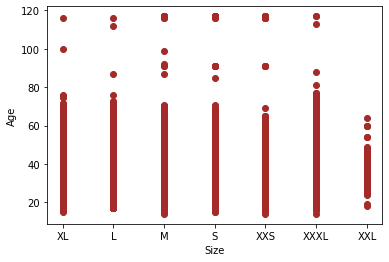

In [13]:
#Age vs Size graph
x = ClothesSize["size"]
y=ClothesSize["age"]

plt.scatter(x, y,color='brown') 
plt.xlabel("Size")
plt.ylabel("Age")
plt.show()

Every sizes has age group of 20-60 years.

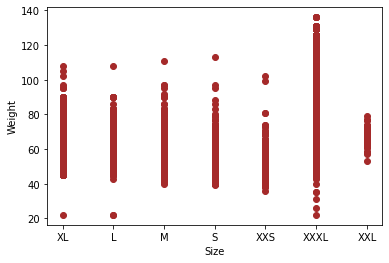

In [14]:
#weight vs Size graph
x = ClothesSize["size"]
y=ClothesSize["weight"]
plt.scatter(x, y,color='brown')
plt.xlabel("Size")
plt.ylabel("Weight")
plt.show()

only XXXL size has weight distribution from 20-140 kgs.

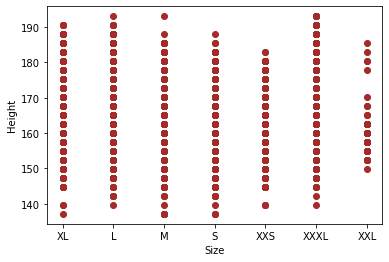

In [15]:
#height vs Size graph

x = ClothesSize["size"]
y=ClothesSize["height"]

plt.scatter(x, y,color='brown')
plt.xlabel("Size")
plt.ylabel("Height")
plt.show()

So, I have decided to use 3 algorithms on the dataset to predict Clothes size.
In order to do that first convert Sizes into numeric values.

In [16]:
ClothesSize["size"] = ClothesSize["size"].map({"XL" : 5,  "L" : 4, "M" : 3, 'S': 2, 'XXS': 1,  "XXXL" : 7 , "XXL" : 6})

Before applying algorithms, I will split the data into training and testing set.
For predicting size Age, Height and Weight are important variables.So selecting all of them for this problem.

In [17]:
from sklearn.model_selection import train_test_split
#Input variable-everything other than size
X=ClothesSize.drop(['size'],axis=1)
# Target variable
y=ClothesSize['size']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.25,
                                                    random_state=1, stratify=y)
print("Count of Training data set:",len(X_train))
print("Count of Testing data set:",len(X_test))

Count of Training data set: 89328
Count of Testing data set: 29776


# Results
# 1. Logistic Regression

In [18]:
#importing package for Logistic Regression
from sklearn.linear_model import LogisticRegression
#multinomial- for mutliclassification
#using solver=saga
#using C=20

LR = LogisticRegression(solver="saga" ,C=20, multi_class='multinomial',random_state=0)
LR.fit(X_train,y_train)

LRResultmodel = round(LR.score(X_test,y_test),2)
LRResultmodel1 = round(LR.score(X_train,y_train),2)
print("Accuracy using Logistic Regression on train data:",LRResultmodel1)
print("Accuracy using Logistic Regression on test data:",LRResultmodel)

Accuracy using Logistic Regression on train data: 0.5
Accuracy using Logistic Regression on test data: 0.5


Logistic Regression is giving 50% accuracy on test and train data.
Using K-fold cross-validation method to compute mean accuracy:

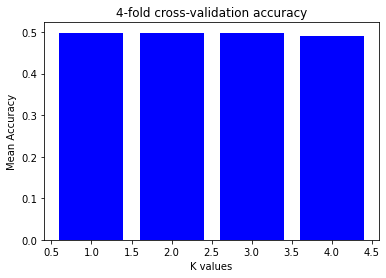

Mean performance by Logistic Regression is: 49.58


In [19]:
# using 4-fold cross-validation - compute the mean accuracy for Logistic Regression
import math
#For mean function
from statistics import mean
#importing package for Logistic Regression
from sklearn.model_selection import cross_val_score
k1=[1,2,3,4]
k=4
mod=LogisticRegression(solver="saga" ,C=20.0, multi_class='multinomial',
                       random_state=0,max_iter=200)
#computing mean accurracy for each k value
scores = cross_val_score(mod, X_train, y_train, cv=k)

#plotting grpah of accuracy
plt.bar(k1,scores,color="blue")
plt.title("4-fold cross-validation accuracy")
plt.xlabel("K values")
plt.ylabel("Mean Accuracy")
plt.show()

#computing average performance
meanv= round(mean(scores)*100,2)
print('Mean performance by Logistic Regression is:',meanv)

As shown above k-fold cross validation is giving around 50% accuracy for Logistic Regression model.


# 2.Decision Tree Classifier

In [20]:
#importing package for Decision Tree Classifier
from sklearn import metrics
from sklearn import tree
#DecisionTreeClassifier for depth =10
dt = tree.DecisionTreeClassifier(max_depth = 10, random_state=1) 

#fitting model on train set
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
#computing result
DTCResult=round(metrics.accuracy_score(y_test, y_pred),4)
print("Accuracy of Decision Tree Classifier on test data:",DTCResult)

Accuracy of Decision Tree Classifier on test data: 0.5128


Decision Tree Classifier is giving 51.28 % of accuracy. 
Using K-fold method,cross validate the Decision Tree Classifier:

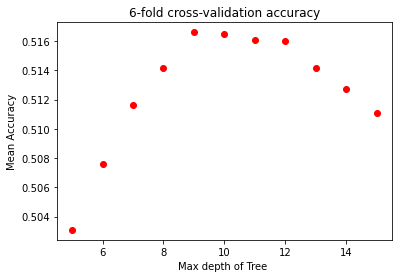

In [21]:
#Giving range for maximum depth
maxd= [5,6,7,8,9,10,11,12,13,14,15]
# mean accuracy for k folds for tree depth
meanAccuracy = [] 
#for 6-fold
k=6
for i in range(0,len(maxd)):
    decisiontree = tree.DecisionTreeClassifier(max_depth=maxd[i], random_state=i)
    scores = cross_val_score(decisiontree, X, y, cv=k)
    meanAccuracy.append(sum(scores)/len(scores))

#plotting the graph
plt.scatter(maxd,meanAccuracy,color="red")
plt.title("6-fold cross-validation accuracy")
plt.xlabel("Max depth of Tree ")
plt.ylabel("Mean Accuracy")
plt.show()

Graph shows Mean accuracy obtained by the model at different Maximum depth of tree values.
So avaerage accuracy is still coming around 51%.


# 2. Random Forest Classifier

In [22]:
#importing package for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#writing model 
RFC = RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='auto',
                             criterion='gini',max_depth=200,random_state=3,oob_score=True)

#fitting the model on train data
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

#computing accuracy result
RFResult=round(metrics.accuracy_score(y_test, y_pred),4)
print("Accuracy of  Random Forest Classifier on test set:",RFResult)


Accuracy of  Random Forest Classifier on test set: 0.512


Random Forest Classifier is giving around 51.2 % accuracy.
OOB score(Out of bag) is method for validating  Random forest classifier model. 

In [23]:
#computing OOB score
OOB=round(RFC.oob_score_,4)
print("OOB score:",OOB) # Alternative to test set validation method

OOB score: 0.509


OOB score is almost same as accuracy. So model is working fine.

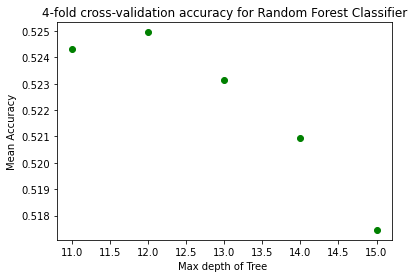

In [24]:
#Giving range for maximum depth
maxd= [11,12,13,14,15]

# mean accuracy for the k values on tree depth
meanAccuracy = [] 

#for 4-folds
k=4

#computing 4-folds cross validation scores
for i in range(0,len(maxd)):
    RFC1=RandomForestClassifier(n_estimators=100,bootstrap=True,
                                max_features='auto',criterion='gini',
                                max_depth=maxd[i],random_state=i)
    scores = cross_val_score(RFC1, X, y, cv=k)
    meanAccuracy.append(sum(scores)/len(scores))
    
# plotting the graph

plt.scatter(maxd,meanAccuracy,color="green")
plt.title("4-fold cross-validation accuracy for Random Forest Classifier")
plt.xlabel("Max depth of Tree ")
plt.ylabel("Mean Accuracy")
plt.show()

# Conclusion
Comparing accuracy results from 3 algorithm:


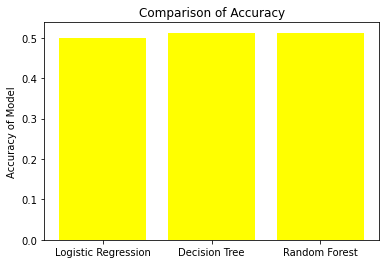

In [25]:
#plotting comparision graph
#Names of 3 models used
xax = ["Logistic Regression","Decision Tree","Random Forest"]
#Accuracy of models
yax = [LRResultmodel,DTCResult, RFResult]

plt.bar(xax,yax,color='yellow');
plt.ylabel("Accuracy of Model")
plt.title("Comparison of Accuracy");
plt.show()

Logistic Regression is having lowest accuracy among all.
Decision Tree Classifier and Random Forest Classifier have almost same accuracy. 
All 3 models are not fitting good as one needs.Accuracy can be improved further using other algortithms

# References:
1.https://moodle.essex.ac.uk/course/view.php?id=15076&section=10

2.https://www.kaggle.com/tourist55/clothessizeprediction

3.https://realpython.com/logistic-regression-python/